# Dimensionality Reduction via Principle Component Analysis 

There are subtle differences between PCA and singular value decomposition (SVD) that we won't get into in this class -- for our purpose, both techniques give us the (eigen-)vectors of the new axes, and the (eigen-)values along each axis that represent the variance of the data points projected onto that axis.

SVD/PCA is a transformation matrix that rotates the data points into a new co-ordinate system where

* each axis (eigenvector) is orthogonal
* the variance of the points along each axis is represented by the eigenvalues
* the output usually sorts the eigenvectors by decreasing order of eigenvalues

![SVD rotation](https://qph.fs.quoracdn.net/main-qimg-fdce4658f6db6fa90ab42bff2ff81c61-c)

Why is this useful?

## Load data

In [4]:
import csv
import numpy as np
import pprint
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

%matplotlib inline

# reads a csv file ignoring the first header row
# convert all fields to int
# returns a numpy array
def readCSV(fname):
    with open(fname, newline='') as csvfile:
        csvdata = csv.reader(csvfile, delimiter=',')
        i=0
        data=[]
        for row in csvdata:
            if i>0:
                data.append([int(col) for col in row])
            elif i==0:
                pprint.pprint(row)
            i = i+1
    return np.asarray(data)

fcdata=readCSV('train.csv')


['Id',
 'Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40',
 'Cover_Type']


In [20]:
# take a random sample of the data to plot
subsetsize = 2000
datasubset = fcdata[np.random.choice(fcdata.shape[0],subsetsize,replace=False),:]

# ignore col #0 and the binary encoded soiltype columns #15:
dataX = datasubset[:,1:15]
dataY = datasubset[:,55]

pcamodel = PCA(n_components=10)
pcamodel.fit(dataX)

print(pcamodel.singular_values_)

[ 66901.7698271   37571.17417532  15250.7515777    8449.02113017
   5150.93449458   2038.80059218   1696.97126254   1100.32857262
    285.35344031     75.0370311 ]


## Dimensionality Reduction

* we can decide to discard the axes with low variance -- How do we choose?
* but we will need to work with the data in this new coordinate space spanned by the top axes that we picked. 
* transform the data into the new coordinate system

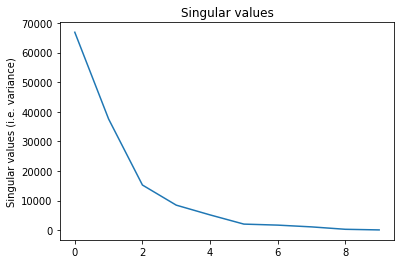

In [21]:
plt.plot(range(10),pcamodel.singular_values_)
# add a title
plt.title("Singular values")
# add a label to the y-axis
plt.ylabel("Singular values (i.e. variance)")
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

tgtdim = 6
pcamodel = PCA(n_components=tgtdim)
pcamodel.fit(dataX)

oldX = fcdata[:,1:15]
newX = pcamodel.transform(oldX)
origY = fcdata[:,55]

print(oldX[0,:])
print(newX[0,:])

#trgX1, tstX1, trgY1, tstY1 = \
#train_test_split(oldX, origY, test_size=0.20, random_state=42)

#trgX2, tstX2, trgY2, tstY2 = \
#train_test_split(newX, origY, test_size=0.20, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

neigh1 = KNeighborsClassifier(n_neighbors=3)
neigh2 = KNeighborsClassifier(n_neighbors=3)

from sklearn.model_selection import cross_val_score
print("Cross Validation for old X: ")
print(cross_val_score(neigh1, oldX, origY, cv=5))
print("Cross Validation for new X: ")
print(cross_val_score(neigh2, newX, origY, cv=5))

[2596   51    3  258    0  510  221  232  148 6279    1    0    0    0]
[ 1713.16663471  4553.87319363  -343.03946251    99.94335568   -30.92884182
   -71.33420061]
Cross Validation for old X: 
[ 0.71362434  0.68220899  0.67096561  0.68816138  0.80654762]
Cross Validation for new X: 
[ 0.70998677  0.67427249  0.6712963   0.67824074  0.80324074]
